<h1>Homework 2: Problem Two</h1>

This is an extension to the code from [here](https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb "Linear Regression Gradient Descent - Python Notebook") that adds another dimension to the mini-batch gradient descent function.

**Imports and Label Initialization**

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)

<h1>Original Function</h1>

This will be the function that the mini-batch gradient descent will attempt to replicate.

In [0]:
def orig_f (x_1, x_2):
  return 3 + 5*x_1 + 7*x_2

<h1>Generate Random Points</h1>

Here we will generate a random set a points $$(x_1,x_2,y)$$ close to the original function.

In [0]:
# Creates random (x, y, z) points
m = 100
x_1 = 2 * np.random.rand(m, 1)
x_2 = 2 * np.random.rand(m, 1)
y = orig_f(x_1, x_2) + np.random.rand(m, 1)

We can plot the original function and the set of random points as follows:

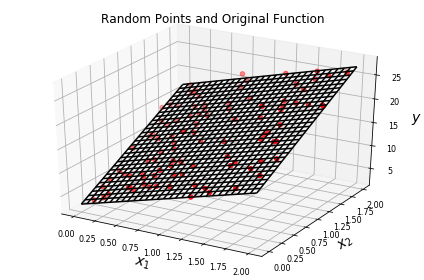

In [110]:
# Configure dimensions and data for plot
x_1_dim = np.linspace(0, 2, 30)
x_2_dim = np.linspace(0, 2, 30)
X_1, X_2 = np.meshgrid(x_1_dim, x_2_dim)
Y = orig_f(X_1, X_2)

# Configure plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plots the orginal function
ax.plot_wireframe(X_1, X_2, Y, color='black')

# Plots the random points
ax.scatter3D(x_1, x_2, y, color='red')

# Set labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Random Points and Original Function')

# Make everything fit on the chart
plt.tight_layout()

<h1>The Hyperparameters</h1>

Here, we specify the different hyperparameters that we will use during gradient descent.

In [0]:
# number of epochs
epochs = 100
# learning rate
lr = 0.01
# batch size
batch_size = 4
# Create three inital weights for w_0 (b), w_1 (x_1), w_2 (x_2)
initial_weight = np.random.randn(3, 1) 

<h1>Linear regression using mini-batch gradient descent</h1>

Now, using the hyperparameters, we can run the mini-batch gradient descent.

In [0]:
# We column stack x1 and x2 to form a matrix x of the bias terms
# (intialized to 1) and x_i. This matrix has shape (m, 3)
x = np.column_stack([np.ones(shape=(m, 1)),
                    x_1, x_2])

# Sets the weight to be the initial weight
weight = initial_weight

# This will hold all weights from each batch
weight_path_mgd = []
weight_path_mgd.append(weight)
# Performs each epoch
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    xi_shuffled = x[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # Runs each mini-batch
    for i in range(0, m, batch_size):
        xi = xi_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

We can see what the MBGD found as the final weights:

In [113]:
# Gets the final weights
weight_path_mgd[-1]

array([[3.62251425],
       [4.89927899],
       [6.98943043]])